In [1]:
pip install yfinance

DEPRECATION: slack-bot 0.0.7 has a non-standard dependency specifier parse>=1.12.0<2.0.0. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of slack-bot or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import yfinance as yf

In [19]:
tsla = yf.Ticker("TSLA")
history = tsla.history(period="1d")
print(history)

                                 Open        High         Low       Close  \
Date                                                                        
2024-06-06 00:00:00-04:00  174.600006  179.729996  172.729996  177.940002   

                             Volume  Dividends  Stock Splits  
Date                                                          
2024-06-06 00:00:00-04:00  69578400        0.0           0.0  


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/yfinance/utils.py:768: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


In [15]:
news = tsla.news
top_3_news = sorted(news, key=lambda x: x['providerPublishTime'], reverse=True)[:3]

# Print the top 3 news items
for news_item in top_3_news:
    print(news_item['title'])

Nvidia Stock Slips After Passing $3 Trillion Milestone
Is Microsoft Corporation A High Quality Stock to Buy Now?
Short bets against Nvidia stand at $34 billion, S3 Partners says


In [16]:
#keep open, high, low, close
history = history[["Open", "High", "Low", "Close"]]

In [19]:
import pandas as pd
import json

def convert_to_json_format(df):
    #add date column
    df['Date'] = df.index
    # Ensure the DataFrame has the required columns
    if not {'Date', 'Open', 'High', 'Low', 'Close'}.issubset(df.columns):
        raise ValueError("DataFrame must contain 'Date', 'Open', 'High', 'Low', 'Close' columns")
    
    # Convert 'Date' column to datetime if it's not already
    df['Date'] = pd.to_datetime(df['Date'])
    
    # Prepare the data in the required format
    series_data = []

    for index, row in df.iterrows():
        timestamp = int(row['Date'].timestamp() * 1000)
        open_price = row['Open']
        high_price = row['High']
        low_price = row['Low']
        close_price = row['Close']
        
        series_data.append([timestamp, open_price, high_price, low_price, close_price])

    output = {
        "series": [{
            "data": series_data
        }]
    }
    
    return json.dumps(output)

df = pd.DataFrame(history)
json_output = convert_to_json_format(df)
print(json_output)

{"series": [{"data": [[1686110400000, 228.0, 230.8300018310547, 223.1999969482422, 224.57000732421875], [1686196800000, 224.22000122070312, 235.22999572753906, 223.00999450683594, 234.86000061035156], [1686283200000, 249.07000732421875, 252.4199981689453, 242.02000427246094, 244.39999389648438], [1686542400000, 247.94000244140625, 250.97000122070312, 244.58999633789062, 249.8300018310547], [1686628800000, 253.50999450683594, 259.67999267578125, 251.33999633789062, 258.7099914550781], [1686715200000, 260.1700134277344, 261.57000732421875, 250.5, 256.7900085449219], [1686801600000, 248.39999389648438, 258.95001220703125, 247.2899932861328, 255.89999389648438], [1686888000000, 258.9200134277344, 263.6000061035156, 257.2099914550781, 260.5400085449219], [1687233600000, 261.5, 274.75, 261.1199951171875, 274.45001220703125], [1687320000000, 275.1300048828125, 276.989990234375, 257.7799987792969, 259.4599914550781], [1687406400000, 250.77000427246094, 265.0, 248.25, 264.6099853515625], [16874

In [3]:
print(tsla.news)

[{'uuid': '4205eaa9-f620-3a0b-a81a-0e82c7c9fd0b', 'title': 'Magnificent Seven Stocks: Nvidia Stock Rallies To More Record Highs; Tesla Finds Support At Key Level', 'publisher': "Investor's Business Daily", 'link': 'https://finance.yahoo.com/m/4205eaa9-f620-3a0b-a81a-0e82c7c9fd0b/magnificent-seven-stocks%3A.html', 'providerPublishTime': 1717610982, 'type': 'STORY', 'thumbnail': {'resolutions': [{'url': 'https://s.yimg.com/uu/api/res/1.2/kV2Fc5Kz3y8hNbXlVxHRQg--~B/aD01NjU7dz0xMDAwO2FwcGlkPXl0YWNoeW9u/https://media.zenfs.com/en/ibd.com/d5bee44b5deef90ccff5d488feb6722d', 'width': 1000, 'height': 565, 'tag': 'original'}, {'url': 'https://s.yimg.com/uu/api/res/1.2/My3O.I831YydYsn.iMoUvw--~B/Zmk9ZmlsbDtoPTE0MDtweW9mZj0wO3c9MTQwO2FwcGlkPXl0YWNoeW9u/https://media.zenfs.com/en/ibd.com/d5bee44b5deef90ccff5d488feb6722d', 'width': 140, 'height': 140, 'tag': '140x140'}]}, 'relatedTickers': ['NVDA', 'AAPL', 'TSLA', 'META', 'MSFT']}, {'uuid': '46962f7d-de69-30a0-b983-49a9b3d93e9c', 'title': "A Cybertr

In [11]:
msft = yf.Ticker("MSFT")

#grab data for multiple tickers
tickers = ["AAPL", "MSFT", "GOOGL", "AMZN", "TSLA"]
data = yf.download(tickers, period="1y")
#arrange the df so that the tickers are the columns and we have the closing prices
data = data["Close"]


[*********************100%***********************]  5 of 5 completed
                  AAPL        AMZN       GOOGL        MSFT        TSLA
Date                                                                  
2023-06-05  179.580002  125.300003  126.010002  335.940002  217.610001
2023-06-06  179.210007  126.610001  127.309998  333.679993  221.309998
2023-06-07  177.820007  121.230003  122.500000  323.380005  224.570007
2023-06-08  180.570007  124.250000  122.139999  325.260010  234.860001
2023-06-09  180.960007  123.430000  122.230003  326.790009  244.399994


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/yfinance/utils.py:768: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/yfinance/utils.py:768: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/yfinance/utils.py:768: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages

In [12]:
print(data.head())

                  AAPL        AMZN       GOOGL        MSFT        TSLA
Date                                                                  
2023-06-05  179.580002  125.300003  126.010002  335.940002  217.610001
2023-06-06  179.210007  126.610001  127.309998  333.679993  221.309998
2023-06-07  177.820007  121.230003  122.500000  323.380005  224.570007
2023-06-08  180.570007  124.250000  122.139999  325.260010  234.860001
2023-06-09  180.960007  123.430000  122.230003  326.790009  244.399994


In [14]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as snsl
import scipy.optimize as sco
plt.style.use('fivethirtyeight')
np.random.seed(777)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

Text(0, 0.5, 'price in $')

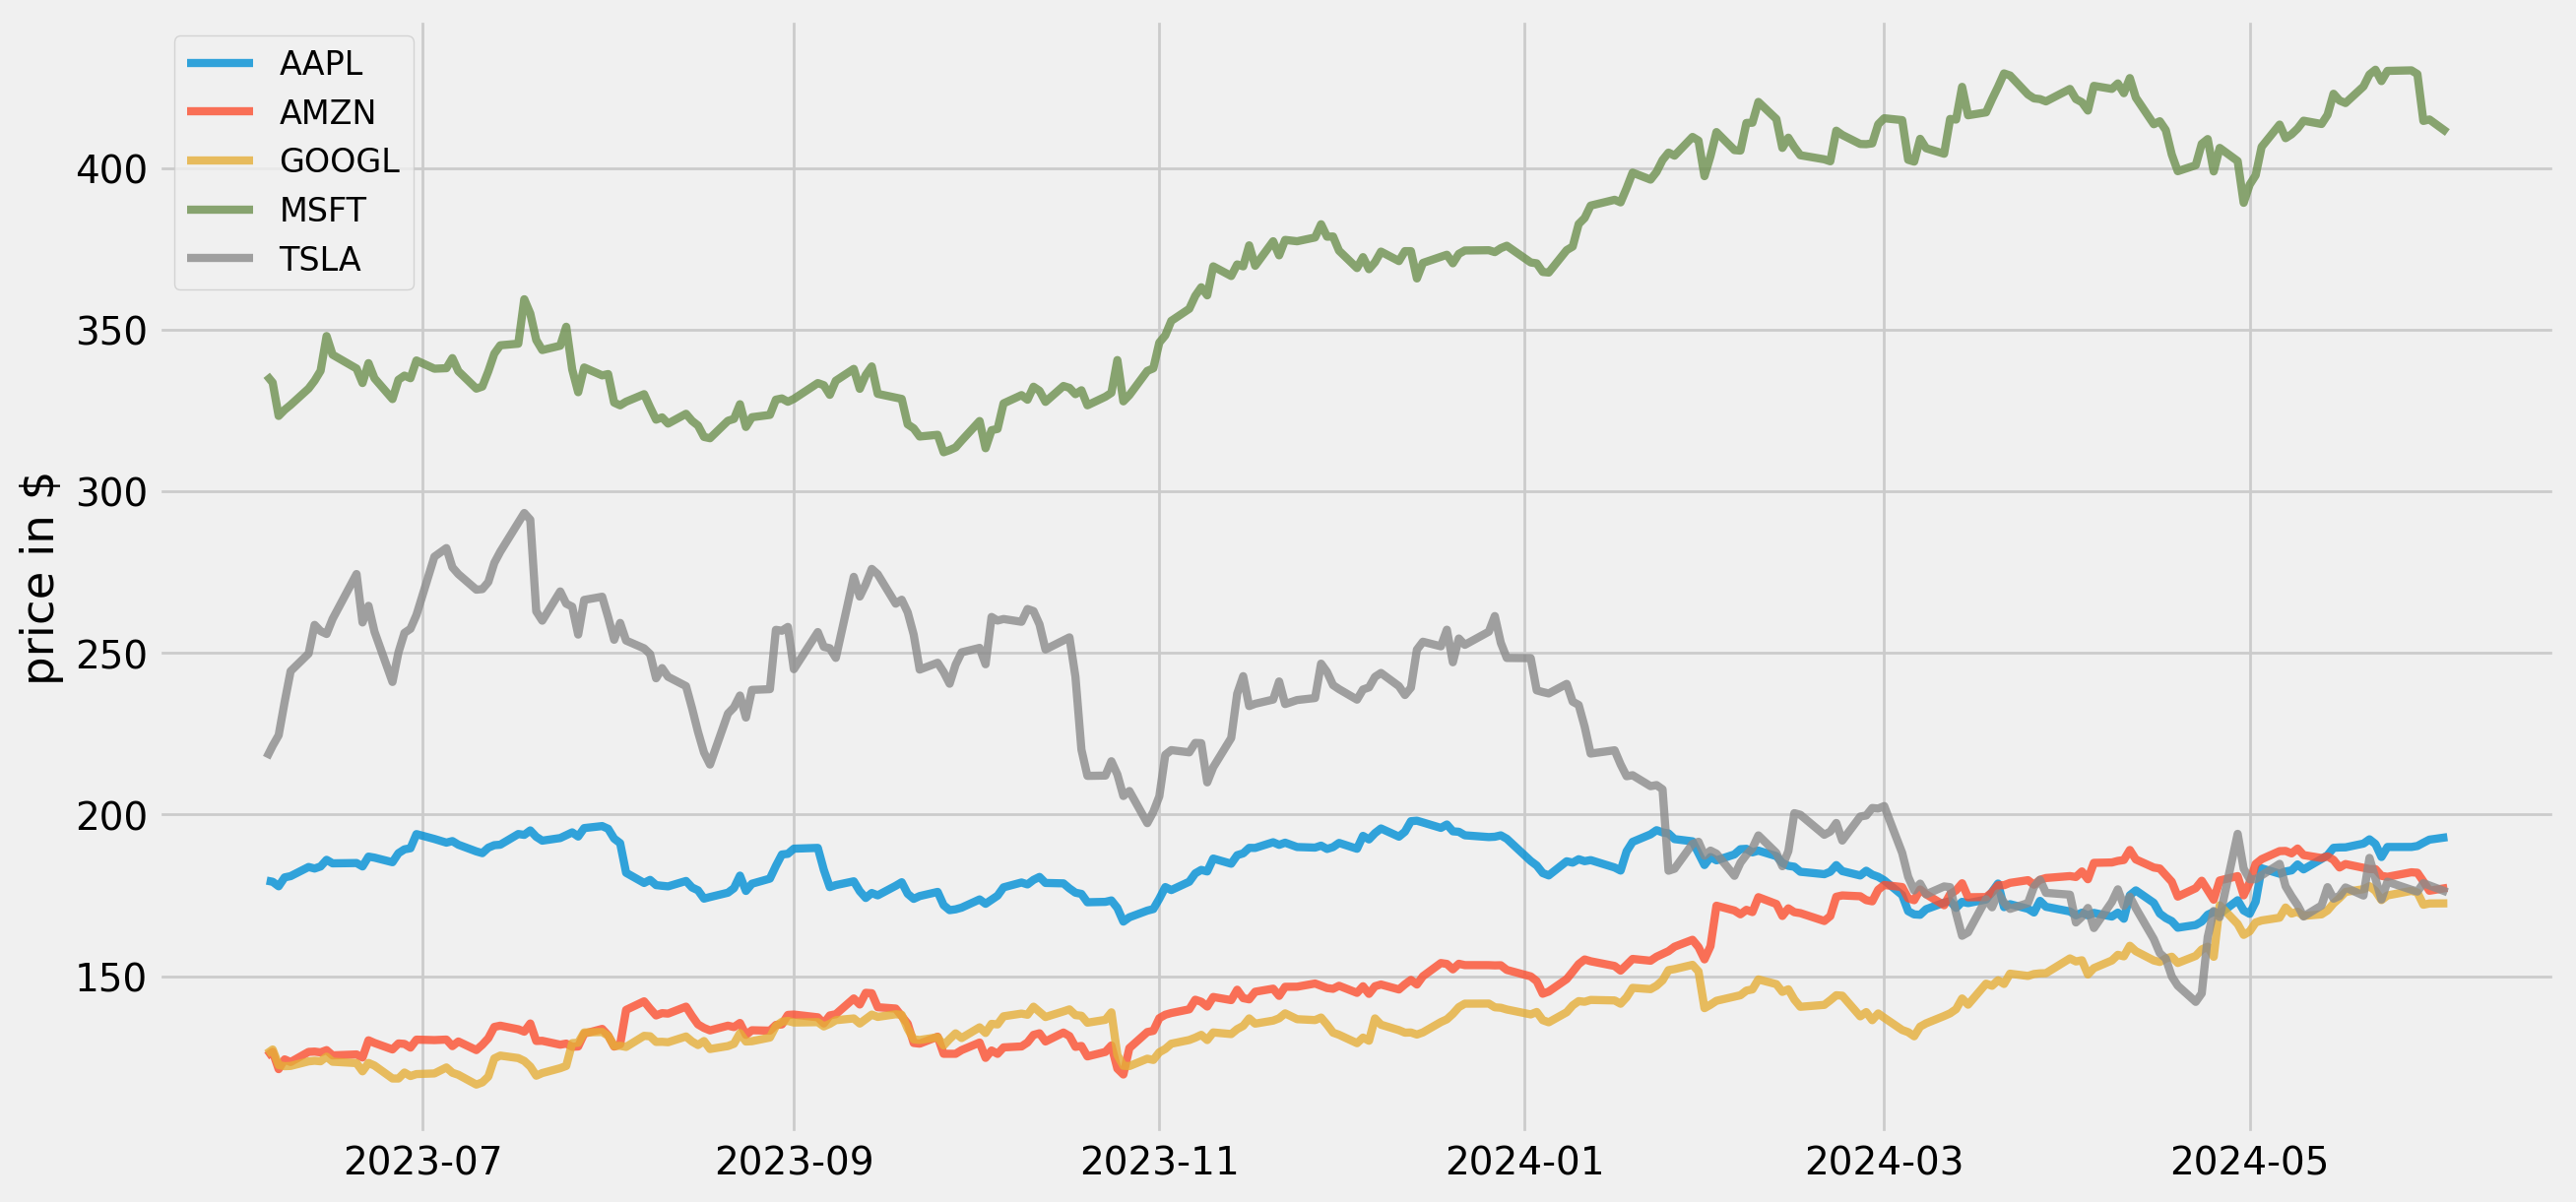

In [15]:
plt.figure(figsize=(14, 7))
for c in data.columns.values:
    plt.plot(data.index, data[c], lw=3, alpha=0.8,label=c)
plt.legend(loc='upper left', fontsize=12)
plt.ylabel('price in $')

Text(0, 0.5, 'daily returns')

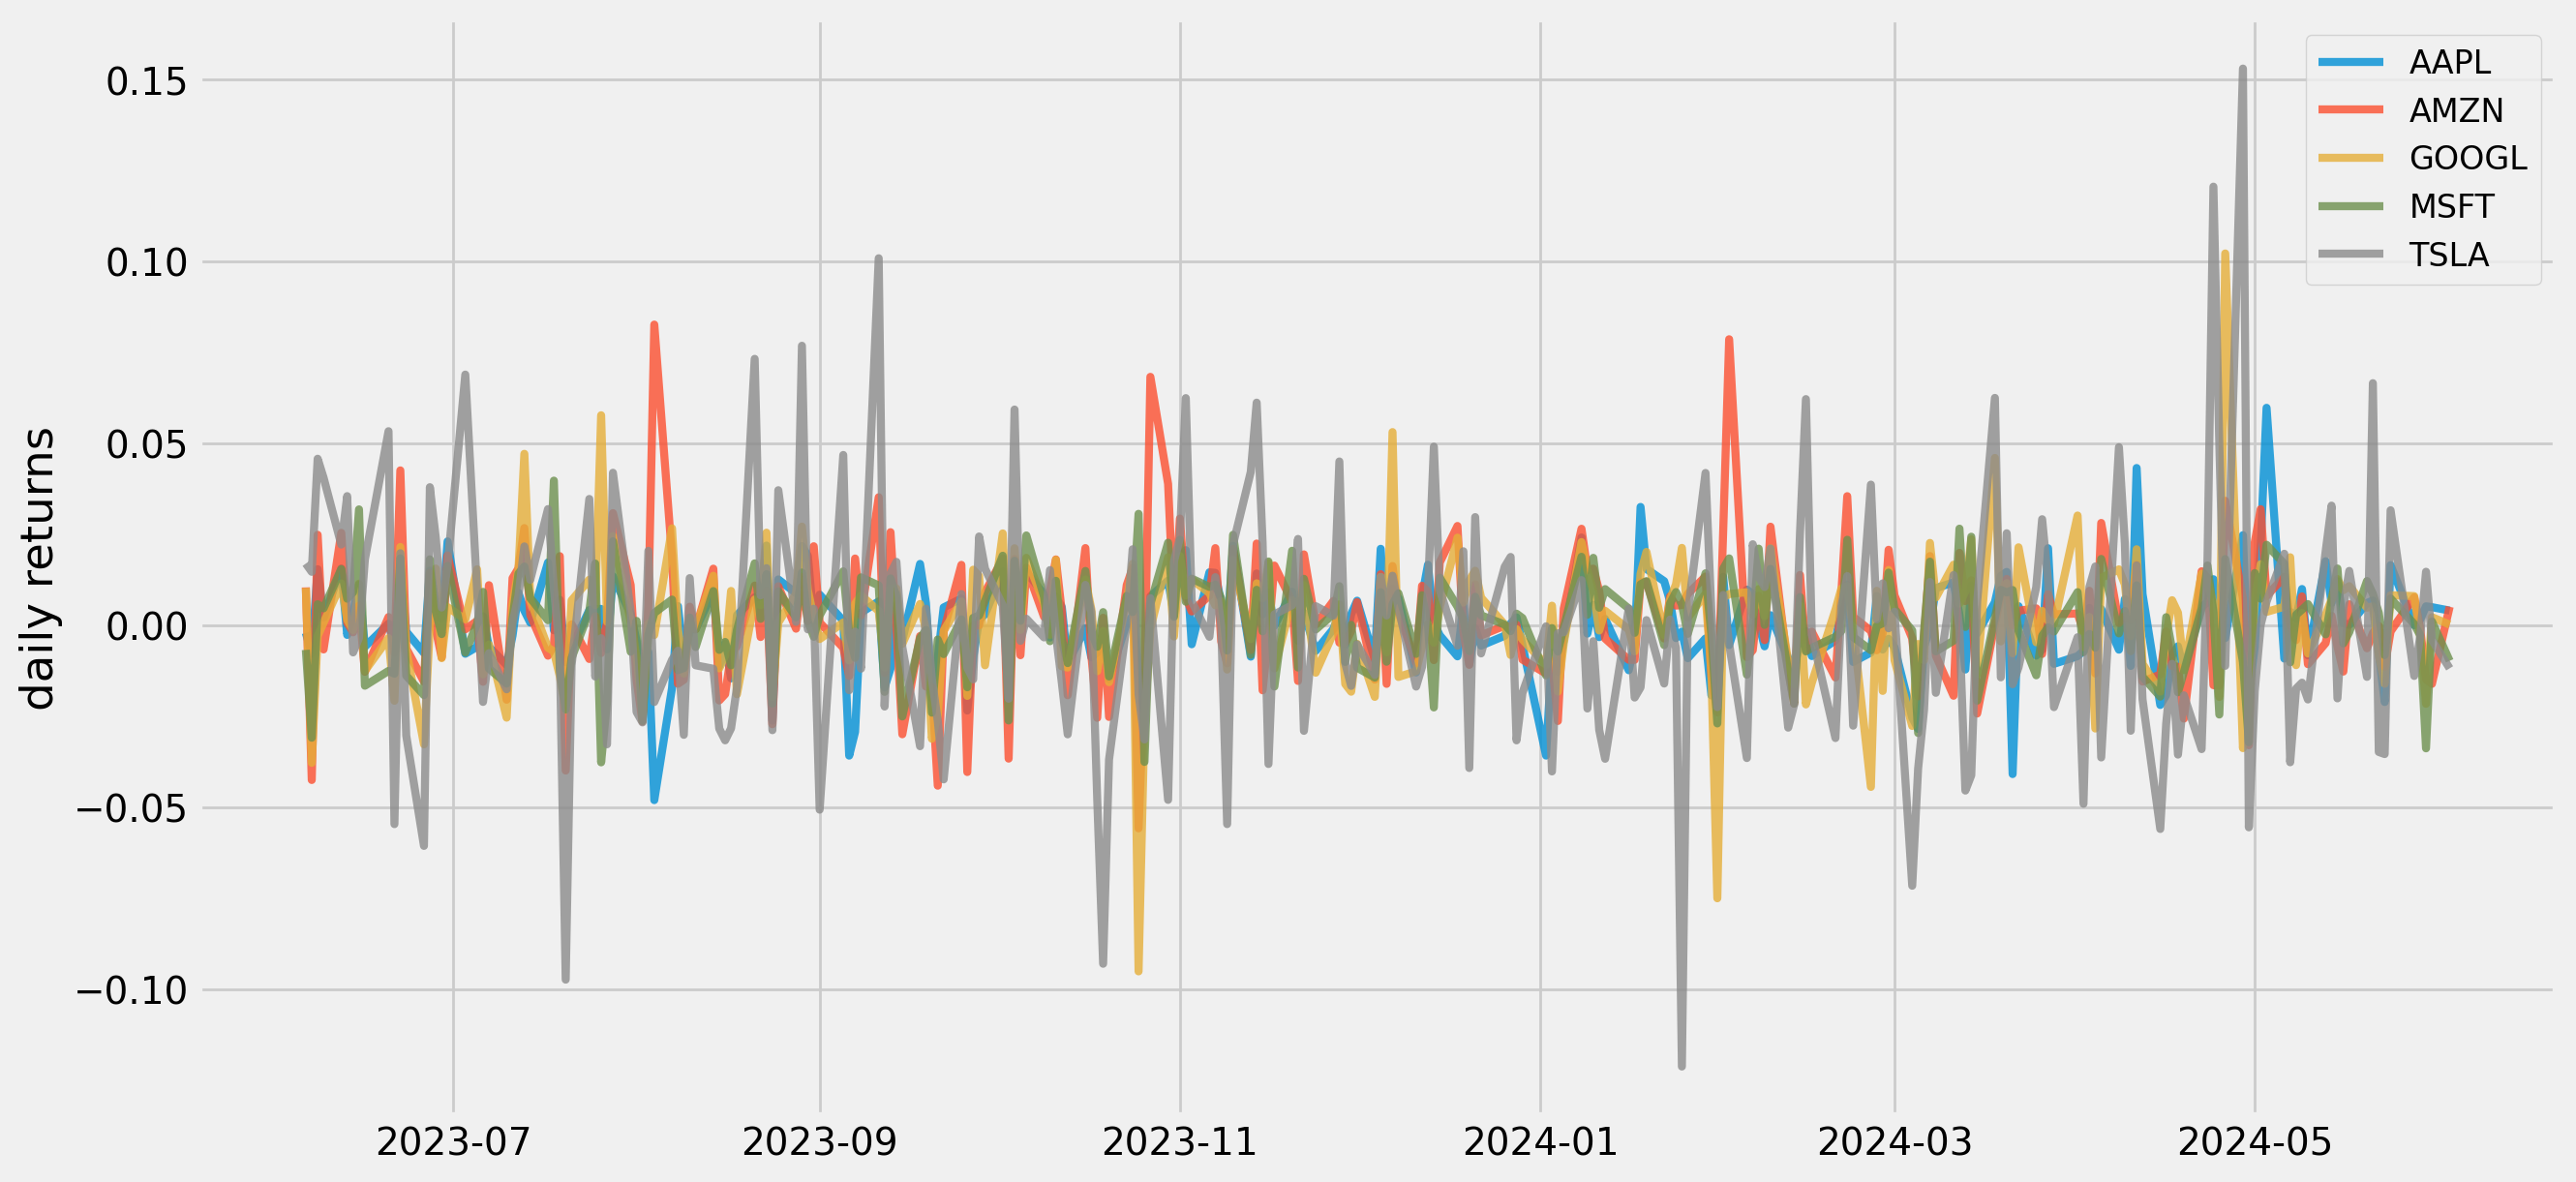

In [16]:
returns = data.pct_change()

plt.figure(figsize=(14, 7))
for c in returns.columns.values:
    plt.plot(returns.index, returns[c], lw=3, alpha=0.8,label=c)
plt.legend(loc='upper right', fontsize=12)
plt.ylabel('daily returns')

In [17]:
#function calculate the returns and the volatility of the portfolio
#252 is the number of trading days in a year
def portfolio_annualised_performance(weights, mean_returns, cov_matrix):
    returns = np.sum(mean_returns*weights ) *252
    std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252)
    return std, returns

In [20]:
#finction will generate portfolios with random weights assigned to each stock in the portfolio
def random_portfolios(num_portfolios, mean_returns, cov_matrix, risk_free_rate):
    results = np.zeros((3,num_portfolios))
    weights_record = []
    for i in range(num_portfolios):
        weights = np.random.random(len(tickers))
        weights /= np.sum(weights)
        weights_record.append(weights)
        portfolio_std_dev, portfolio_return = portfolio_annualised_performance(weights, mean_returns, cov_matrix)
        results[0,i] = portfolio_std_dev
        results[1,i] = portfolio_return
        results[2,i] = (portfolio_return - risk_free_rate) / portfolio_std_dev #Sharpe Ratio
    return results, weights_record

In [57]:
returns = data.pct_change()
mean_returns = returns.mean()
cov_matrix = returns.cov()
num_portfolios = 25000
risk_free_rate = 0.0515

In [58]:
def display_simulated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate):
    results, weights = random_portfolios(num_portfolios,mean_returns, cov_matrix, risk_free_rate)
    
    max_sharpe_idx = np.argmax(results[2])
    sdp, rp = results[0,max_sharpe_idx], results[1,max_sharpe_idx]
    max_sharpe_allocation = pd.DataFrame(weights[max_sharpe_idx],index=data.columns,columns=['allocation'])
    max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.allocation]
    max_sharpe_allocation = max_sharpe_allocation.T
    
    min_vol_idx = np.argmin(results[0])
    sdp_min, rp_min = results[0,min_vol_idx], results[1,min_vol_idx]
    min_vol_allocation = pd.DataFrame(weights[min_vol_idx],index=data.columns,columns=['allocation'])
    min_vol_allocation.allocation = [round(i*100,2)for i in min_vol_allocation.allocation]
    min_vol_allocation = min_vol_allocation.T
    
    print("-" * 80)
    print("Maximum Sharpe Ratio Portfolio Allocation\n")
    print(f"Annualised Return: {round(rp, 2)}")
    print(f"Annualised Volatility: {round(sdp, 2)}")
    print("\n")
    print(max_sharpe_allocation)
    print("-" * 80)
    print("Minimum Volatility Portfolio Allocation\n")
    print(f"Annualised Return: {round(rp_min, 2)}")
    print(f"Annualised Volatility: {round(sdp_min, 2)}")
    print("\n")
    print(min_vol_allocation)

    
    plt.figure(figsize=(10, 7))
    plt.scatter(results[0,:],results[1,:],c=results[2,:],cmap='YlGnBu', marker='o', s=10, alpha=0.3)
    plt.colorbar()
    plt.scatter(sdp,rp,marker='*',color='r',s=500, label='Maximum Sharpe ratio')
    plt.scatter(sdp_min,rp_min,marker='*',color='g',s=500, label='Minimum volatility')
    plt.title('Simulated Portfolio Optimization based on Efficient Frontier')
    plt.xlabel('annualised volatility')
    plt.ylabel('annualised returns')
    plt.legend(labelspacing=0.8)

--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualised Return: 0.35
Annualised Volatility: 0.23


            AAPL   AMZN  GOOGL   MSFT  TSLA
allocation  0.71  45.77  42.63  10.48  0.41
--------------------------------------------------------------------------------
Minimum Volatility Portfolio Allocation

Annualised Return: 0.18
Annualised Volatility: 0.17


             AAPL  AMZN  GOOGL   MSFT  TSLA
allocation  46.69  2.94  11.18  38.27  0.92


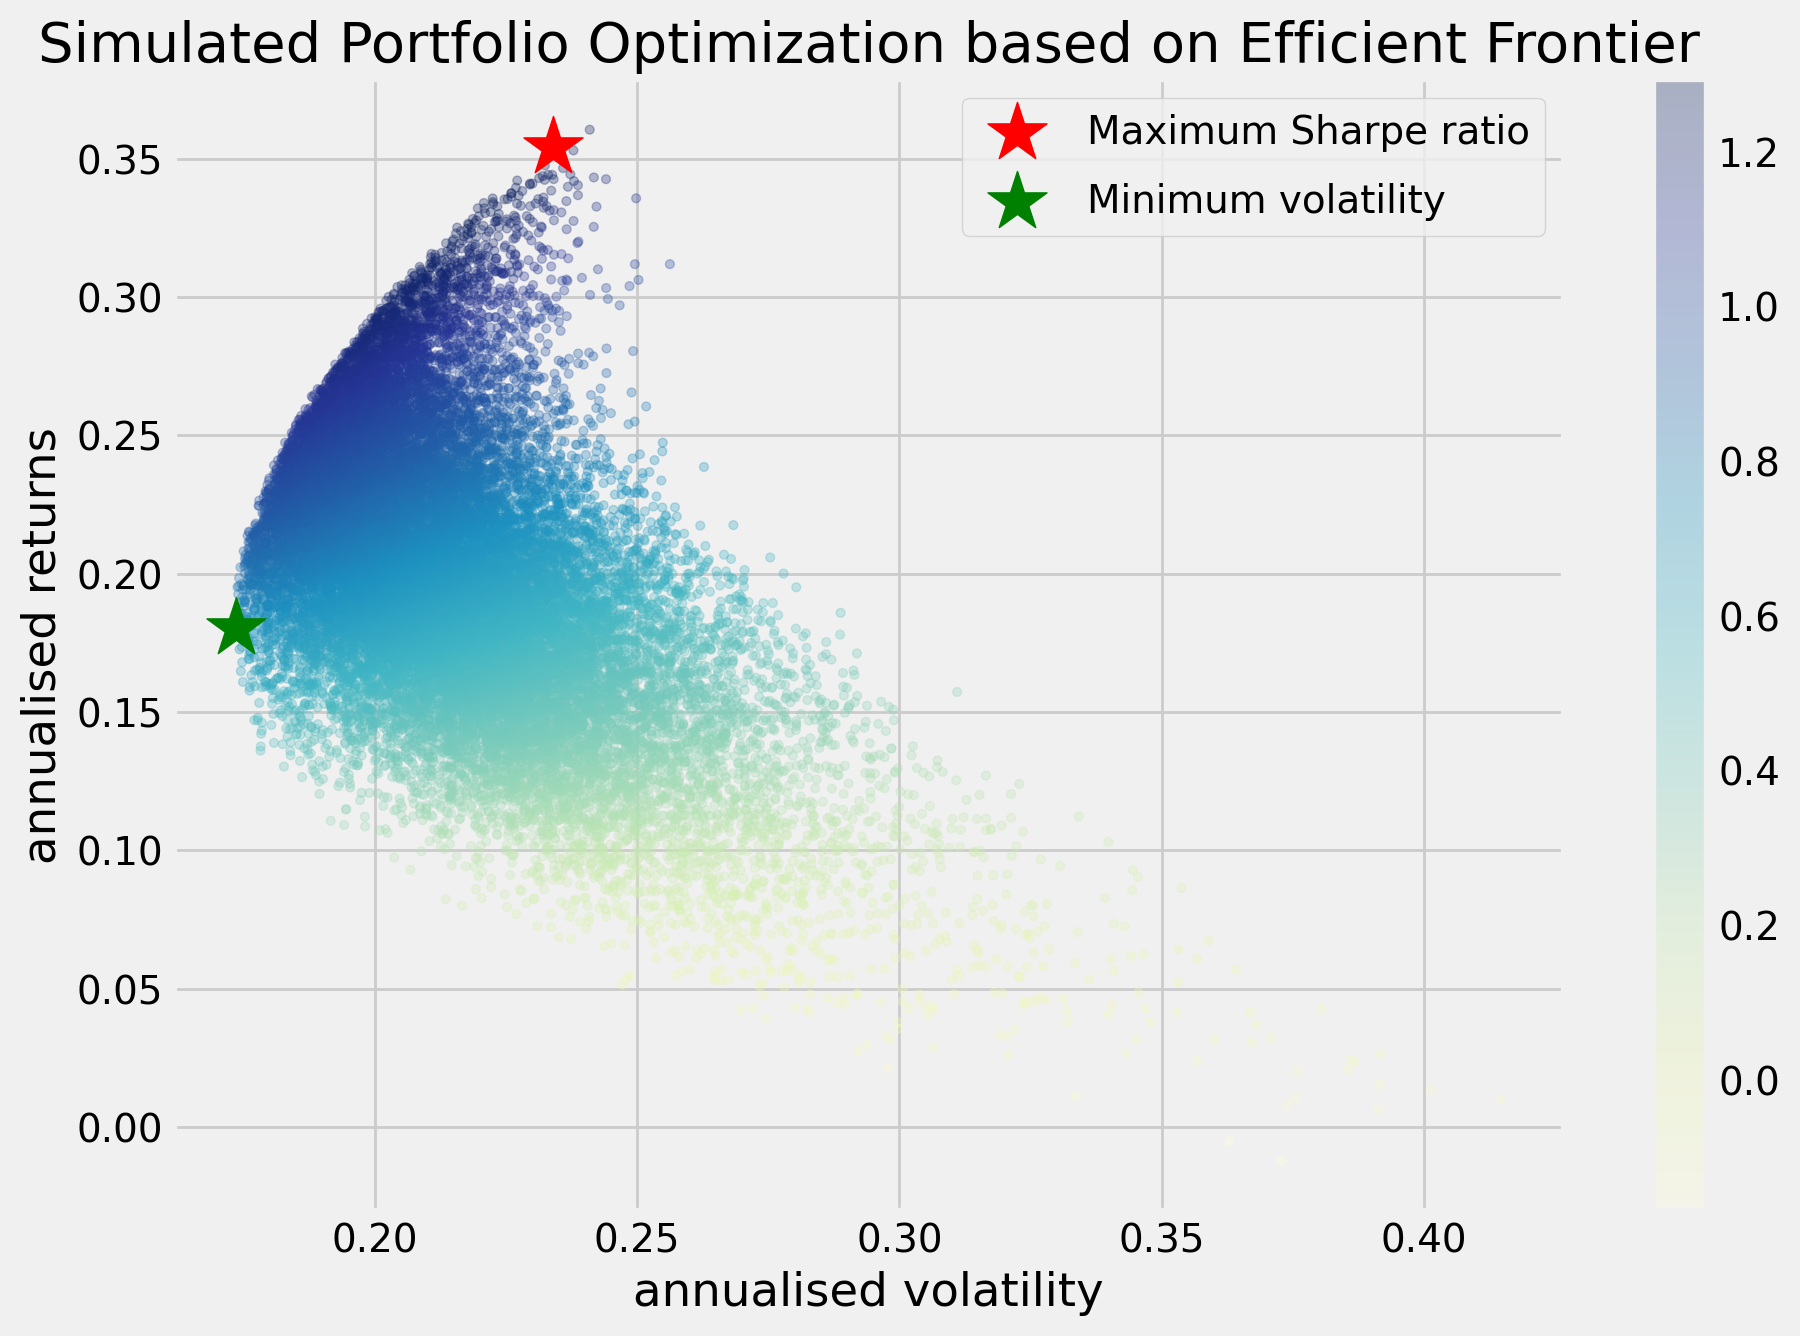

In [63]:
display_simulated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate)

In [72]:
import yfinance as yf
import pandas as pd  
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.optimize as sco

np.random.seed(777)

def get_portfolio_allocations(tickers, period="1y", num_portfolios=25000, risk_free_rate=0.0515):
    # Grab data for multiple tickers
    data = yf.download(tickers, period=period)
    # Arrange the df so that the tickers are the columns and we have the closing prices
    data = data["Close"]
    
    returns = data.pct_change()
    mean_returns = returns.mean()
    cov_matrix = returns.cov()

    # Function to calculate the returns and the volatility of the portfolio
    def portfolio_annualised_performance(weights, mean_returns, cov_matrix):
        returns = np.sum(mean_returns * weights) * 252
        std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252)
        return std, returns

    # Function to generate portfolios with random weights assigned to each stock in the portfolio
    def random_portfolios(num_portfolios, mean_returns, cov_matrix, risk_free_rate):
        results = np.zeros((3, num_portfolios))
        weights_record = []
        for i in range(num_portfolios):
            weights = np.random.random(len(tickers))
            weights /= np.sum(weights)
            weights_record.append(weights)
            portfolio_std_dev, portfolio_return = portfolio_annualised_performance(weights, mean_returns, cov_matrix)
            results[0, i] = portfolio_std_dev
            results[1, i] = portfolio_return
            results[2, i] = (portfolio_return - risk_free_rate) / portfolio_std_dev  # Sharpe Ratio
        return results, weights_record

    def calculate_portfolio_allocations(mean_returns, cov_matrix, num_portfolios, risk_free_rate):
        results, weights = random_portfolios(num_portfolios, mean_returns, cov_matrix, risk_free_rate)

        # Maximum Sharpe Ratio Portfolio
        max_sharpe_idx = np.argmax(results[2])
        max_sharpe_allocation = {data.columns[i]: round(weight * 100, 2) for i, weight in enumerate(weights[max_sharpe_idx])}

        # Minimum Volatility Portfolio
        min_vol_idx = np.argmin(results[0])
        min_vol_allocation = {data.columns[i]: round(weight * 100, 2) for i, weight in enumerate(weights[min_vol_idx])}

        max_sharpe_portfolio = {
            "Annualised Return": round(results[1, max_sharpe_idx], 2),
            "Annualised Volatility": round(results[0, max_sharpe_idx], 2),
            "Allocation": max_sharpe_allocation
        }

        min_vol_portfolio = {
            "Annualised Return": round(results[1, min_vol_idx], 2),
            "Annualised Volatility": round(results[0, min_vol_idx], 2),
            "Allocation": min_vol_allocation
        }

        return max_sharpe_portfolio, min_vol_portfolio

    max_sharpe_portfolio, min_vol_portfolio = calculate_portfolio_allocations(mean_returns, cov_matrix, num_portfolios, risk_free_rate)

    # Convert the portfolios to JSON
    max_sharpe_json = json.dumps(max_sharpe_portfolio, indent=4)
    min_vol_json = json.dumps(min_vol_portfolio, indent=4)

    return max_sharpe_json, min_vol_json

# Example usage
tickers = ["AAPL", "MSFT", "GOOGL", "AMZN", "TSLA"]
max_sharpe_json, min_vol_json = get_portfolio_allocations(tickers)

print(max_sharpe_json)
print(min_vol_json)



[*********************100%***********************]  5 of 5 completed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/yfinance/utils.py:768: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/yfinance/utils.py:768: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/yfinance/utils.py:768: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages


{
    "Annualised Return": 0.35,
    "Annualised Volatility": 0.23,
    "Allocation": {
        "AAPL": 1.54,
        "AMZN": 41.69,
        "GOOGL": 38.83,
        "MSFT": 17.58,
        "TSLA": 0.35
    }
}
{
    "Annualised Return": 0.18,
    "Annualised Volatility": 0.17,
    "Allocation": {
        "AAPL": 49.91,
        "AMZN": 5.16,
        "GOOGL": 9.28,
        "MSFT": 35.43,
        "TSLA": 0.22
    }
}
